In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [126]:
df=pd.read_excel('Airlines+Data.xlsx',index_col='Month')

In [127]:
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [7]:
df.index=df.Month

# Plot

<function matplotlib.pyplot.show(close=None, block=None)>

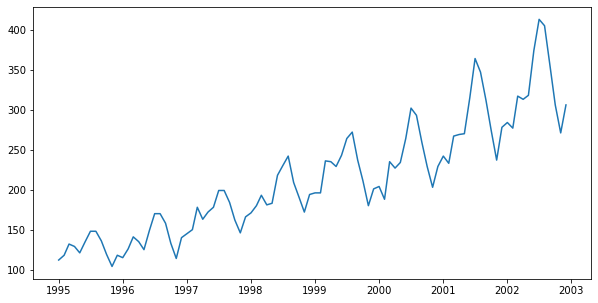

In [14]:
plt.figure(figsize=(10,5))
plt.plot(df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

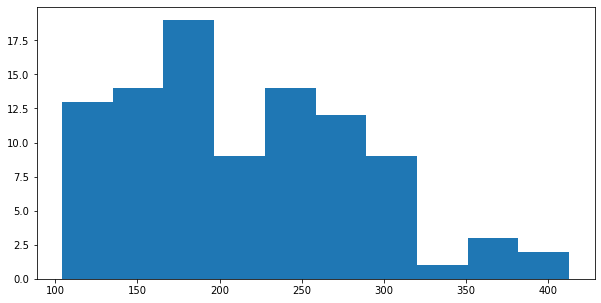

In [15]:
# Histogram
plt.figure(figsize=(10,5))
plt.hist(df)
plt.show

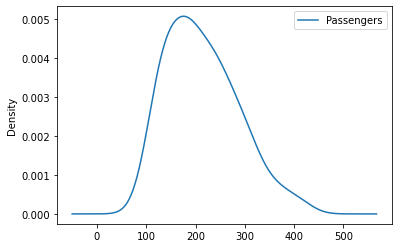

In [27]:
# Kernel Density Estimation plot
x=df.plot(kind='kde')


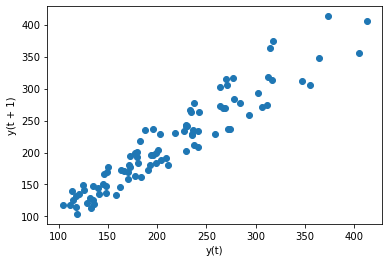

In [29]:
# Lag plot
from pandas.plotting import lag_plot
lag_plot(df)
plt.show()

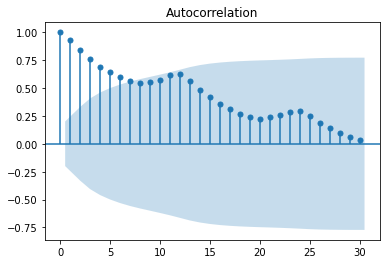

In [30]:
# create an autocorrelation plot

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df,lags=30)
plt.show()

# SquaredTransformation

In [72]:
upsample = df.resample('D').mean()
print(upsample.head(5))

            Passengers
Month                 
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN


            Passengers
Month                 
1995-01-01  112.000000
1995-01-02  112.193548
1995-01-03  112.387097
1995-01-04  112.580645
1995-01-05  112.774194


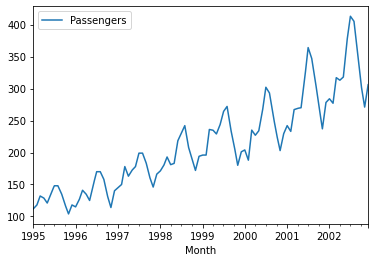

In [73]:
# interpolate the missing value
interpolated = upsample.interpolate(method='linear')
print(interpolated.head(5))
interpolated.plot()
pyplot.show()

Interpolated


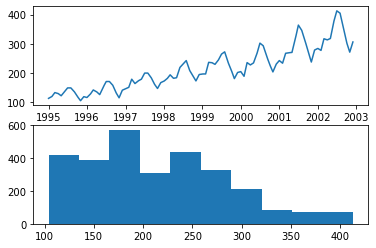

Original


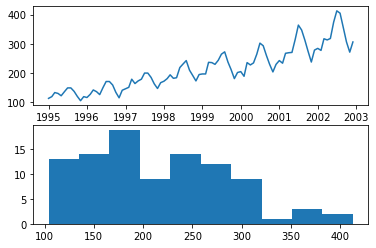

In [74]:
print('Interpolated')
# line plot
pyplot.subplot(211)
pyplot.plot(interpolated)
# histogram
pyplot.subplot(212)
pyplot.hist(interpolated)
pyplot.show()
print('Original') 
# line plot
pyplot.subplot(211)
pyplot.plot(df)
# histogram
pyplot.subplot(212)
pyplot.hist(df)
pyplot.show()

In [75]:
interpolated.head(10)

,Passengers
Month,
1995-01-01,112.000000
1995-01-02,112.193548
1995-01-03,112.387097
1995-01-04,112.580645
1995-01-05,112.774194
1995-01-06,112.967742
1995-01-07,113.161290
1995-01-08,113.354839
1995-01-09,113.548387


# Square Root Transformation

In [76]:
import math

In [77]:
df2 = pd.DataFrame(interpolated,columns=['Passengers'])
df2['Passengers'] =df2['Passengers'].apply(sqrt)

In [78]:
df2

,Passengers
Month,
1995-01-01,10.583005
1995-01-02,10.592146
1995-01-03,10.601278
1995-01-04,10.610403
1995-01-05,10.619519
...,...
2002-11-27,17.358955
2002-11-28,17.392527
2002-11-29,17.426034


Transformed


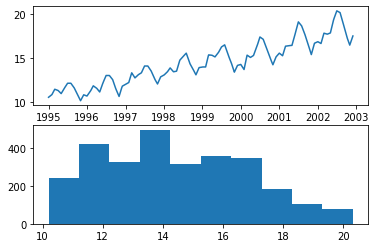

Original


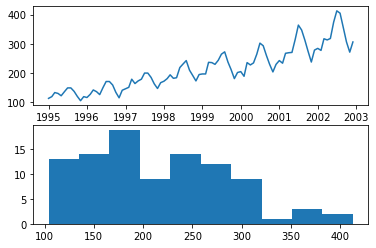

In [85]:
print('Transformed')
# line plot
pyplot.subplot(211)
pyplot.plot(df2['Passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(df2['Passengers'])
pyplot.show()
print('Original')
# line plot
pyplot.subplot(211)
pyplot.plot(df['Passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(df['Passengers'])
pyplot.show()

# Log Transformation

In [86]:
from numpy import log
df3 = pd.DataFrame(interpolated,columns=['Passengers'])
df3['Passengers'] =df3['Passengers'].apply(log)
df3

,Passengers
Month,
1995-01-01,2.359249
1995-01-02,2.360113
1995-01-03,2.360975
1995-01-04,2.361835
1995-01-05,2.362694
...,...
2002-11-27,2.854109
2002-11-28,2.856041
2002-11-29,2.857965


Log Transformed


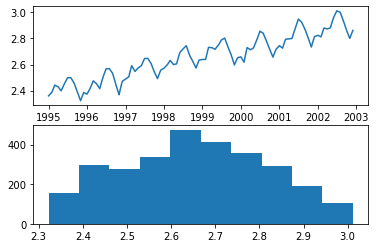

Original


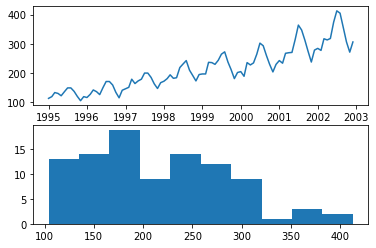

In [87]:
print('Log Transformed')
# line plot
pyplot.subplot(211)
pyplot.plot(df3['Passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(df3['Passengers'])
pyplot.show()

print('Original')
# line plot
pyplot.subplot(211)
pyplot.plot(df['Passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(df['Passengers'])
pyplot.show()

In [94]:
df4=pd.read_excel('Airlines+Data.xlsx')

In [95]:
df4

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [96]:
df4["Date"]=pd.to_datetime(df4.Month,format="%b-%y")
df4["Months"]=df4.Date.dt.strftime("%b")
df4["Year"]=df4.Date.dt.strftime("%Y")

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

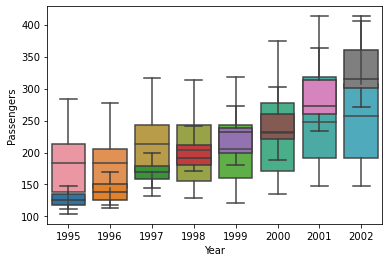

In [98]:
sns.boxplot(x="Months",y="Passengers",data=df4)
sns.boxplot(x="Year",y="Passengers",data=df4)

In [99]:
df4.head()

,Month,Passengers,Date,Months,Year
0,1995-01-01,112,1995-01-01,Jan,1995
1,1995-02-01,118,1995-02-01,Feb,1995
2,1995-03-01,132,1995-03-01,Mar,1995
3,1995-04-01,129,1995-04-01,Apr,1995
4,1995-05-01,121,1995-05-01,May,1995


In [101]:
Month_Dummies = pd.DataFrame(pd.get_dummies(df4['Months']))
df5 = pd.concat([df4,Month_Dummies],axis = 1)

In [102]:
df5["t"] = np.arange(1,97)
df5["t_squared"] = df5["t"]*df5["t"]
df5["Log_Passengers"] = np.log(df5["Passengers"])

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

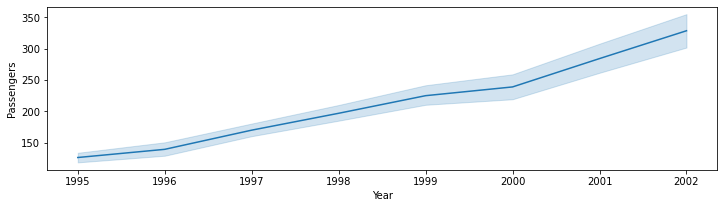

In [104]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Passengers",data=df5)

In [106]:
Train = df5.head(80)
Test = df5.tail(16)

# Model Building

In [107]:
# Linear Model
import statsmodels.formula.api as smf 
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.54262406772677

In [108]:
# Exponential Model
Exp = smf.ols('Log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.79373939334308

In [109]:
# Quadratic Model
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.65440369584248

In [110]:
# Additive Seasonality quadrative

add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad=pd.Series(add_sea_Quad.predict(Test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.91098357010629

In [111]:
#Multiplicative Seasonality

Mul_sea = smf.ols('Log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.32648414621084

In [112]:
#Multiplicative addditive seasonality

Mul_Add_sea = smf.ols('Log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

9.469000230305973

# Evaluation

In [114]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,47.542624
1,rmse_Exp,43.793739
2,rmse_Quad,43.654404
3,rmse_add_sea,23.910984
4,rmse_add_sea_quad,135.326484
5,rmse_Mult_sea,9.469000
6,rmse_Mult_add_sea,NaN


# Prediction

In [115]:
t = np.arange(97,108)
t

array([ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107])

In [116]:
t_squared=np.array(t*t)
t_squared

array([ 9409,  9604,  9801, 10000, 10201, 10404, 10609, 10816, 11025,
       11236, 11449])

In [117]:
Month = pd.DataFrame({'Month':['2003-01-01','2003-02-01','2003-03-01','2003-04-01','2003-05-01','2003-06-01','2003-07-01',
                               '2003-08-01','2003-09-01','2003-10-01','2003-10-01']})

In [118]:
df={'t':t,'t_squared':t_squared}
df=pd.DataFrame(df)

In [119]:
newdata = pd.concat([Month,df],axis=1)
newdata

,Month,t,t_squared
0,2003-01-01,97,9409
1,2003-02-01,98,9604
2,2003-03-01,99,9801
3,2003-04-01,100,10000
4,2003-05-01,101,10201
5,2003-06-01,102,10404
6,2003-07-01,103,10609
7,2003-08-01,104,10816
8,2003-09-01,105,11025
9,2003-10-01,106,11236


In [121]:
model_full = smf.ols('Passengers~t',data=df5).fit()
pred_new  = pd.Series(model_full.predict(newdata))
pred_new

0     326.941886
1     329.276598
2     331.611311
3     333.946023
4     336.280736
5     338.615448
6     340.950161
7     343.284873
8     345.619585
9     347.954298
10    350.289010
dtype: float64

In [122]:
newdata["forecasted_passengers"]=pd.Series(pred_new)

In [123]:
newdata

,Month,t,t_squared,forecasted_passengers
0,2003-01-01,97,9409,326.941886
1,2003-02-01,98,9604,329.276598
2,2003-03-01,99,9801,331.611311
3,2003-04-01,100,10000,333.946023
4,2003-05-01,101,10201,336.280736
5,2003-06-01,102,10404,338.615448
6,2003-07-01,103,10609,340.950161
7,2003-08-01,104,10816,343.284873
8,2003-09-01,105,11025,345.619585
9,2003-10-01,106,11236,347.954298



**OBSERVATION:**

Multiplicative Additive Seasonality gives the best prediction of least RMSE of 9.42